## Processing the Data and Creating the Visualization
Import necessary packages.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt  
import seaborn as sns

Read in the data from the csv file the spider created.

In [2]:
movies = pd.read_csv("results.csv")
movies.head()

,Actor,Film
0,Taylor Kinney,Chicago Fire
1,Taylor Kinney,Chicago P.D.
2,Taylor Kinney,Chicago Med
3,Taylor Kinney,Here and Now
4,Taylor Kinney,Chicago Justice


Create a counts dict where the keys are the film names and the values are the number of actors from movies appearing in the film.

In [3]:
counts = dict() #Set up

#For each row of movies
for obs in movies["Film"]:
    #If the film has already been added to counts, add to total
    if obs in counts.keys():
        counts[obs] = counts[obs] + 1
    #Otherwise add it
    else:
        counts[obs] = 1

We want to sort the dict by the counts, from biggest to smallest. 

In [4]:
sorted_counts = dict(sorted(counts.items(), key=lambda item: -item[1]))

For the chart, we'll want the data to be in a list format. I'm also adding another list if the film is a show in the Chicago franchise, as there's a lot off crossovers there.

In [5]:
films = list(sorted_counts.keys())
counts = list(sorted_counts.values())

#The chicago franchise shows have Chicago as the first 7 characters
franchise = [film[:7] == "Chicago" for film in films]

Now we're ready to make a plot of the top thirty films, or rather shows as it turns out.

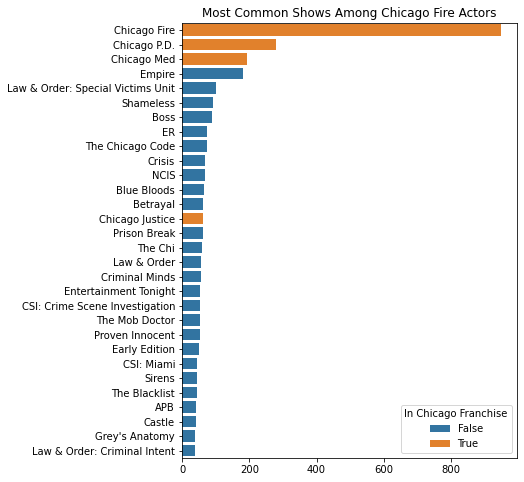

In [6]:
#Setup a tall plot
fig,ax=plt.subplots(figsize=(6,8))

#Create a barchart of the top thirty
sns.barplot(x = counts[:30], 
            y = films[:30],
            hue = franchise[:30], 
            dodge = False)

#Add a title to the chart
ax.set(title = "Most Common Shows Among Chicago Fire Actors")

#Add a title to the legend
ax.legend(title = "In Chicago Franchise")

#Save the figure
fig.savefig("movies.png", bbox_inches = "tight")